In [1]:
# Gradient Boosting Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
254027,26,762,10996,3,10,19,8,t,i,x,...,1,0,0,0,0,0,0,0,0,1
70408,6,1291,5348,2,5,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,1
48311,26,886,12157,1,15,9,6,t,w,n,...,0,0,0,0,0,0,0,0,0,1
151475,27,1106,5639,1,0,9,3,t,i,x,...,0,0,0,0,0,0,0,0,0,1
208462,26,886,66,1,0,11,4,n,u,x,...,0,0,0,0,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
#Encoding
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
254027,26,762,10996,3,10,19,8,2,1,2,...,1,0,0,0,0,0,0,0,0,1
70408,6,1291,5348,2,5,8,5,2,2,0,...,0,0,0,0,0,0,0,0,0,1
48311,26,886,12157,1,15,9,6,2,4,0,...,0,0,0,0,0,0,0,0,0,1
151475,27,1106,5639,1,0,9,3,2,1,2,...,0,0,0,0,0,0,0,0,0,1
208462,26,886,66,1,0,11,4,0,3,2,...,0,0,0,0,0,0,0,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [13]:
x.shape[1]

38

In [14]:
#Splitting dataset into training and testing (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
feature_importance = classifier.feature_importances_

In [19]:
#Arrange features in decreasing order of importance (by scores)
sorted_fi = feature_importance.argsort()

for i in sorted_fi:
    print(f"{train_data.columns[i]}: {feature_importance[i]} \n{i}")


has_secondary_use_institution: 0.0 
31
has_secondary_use_gov_office: 0.0 
35
has_secondary_use_use_police: 0.0 
36
has_secondary_use_health_post: 0.0 
34
has_secondary_use_school: 0.0 
32
has_secondary_use_industry: 0.0 
33
has_superstructure_rc_non_engineered: 5.300766994956419e-05 
22
has_secondary_use_hotel: 8.841007180154476e-05 
29
has_secondary_use_other: 0.0001300289368926764 
37
has_secondary_use_rental: 0.00017181202683786133 
30
has_secondary_use: 0.00021559018304791592 
27
legal_ownership_status: 0.0003531269334667709 
25
has_superstructure_cement_mortar_stone: 0.0004149864229332286 
17
has_superstructure_bamboo: 0.00044849150681324434 
21
plan_configuration: 0.00047169422147150985 
13
has_superstructure_other: 0.0006373987467303549 
24
land_surface_condition: 0.0006952341089208132 
7
has_superstructure_rc_engineered: 0.0010202944088565846 
23
has_secondary_use_agriculture: 0.0018283011042441956 
28
area_percentage: 0.0019131829934668854 
5
position: 0.0021737887130066943 
1

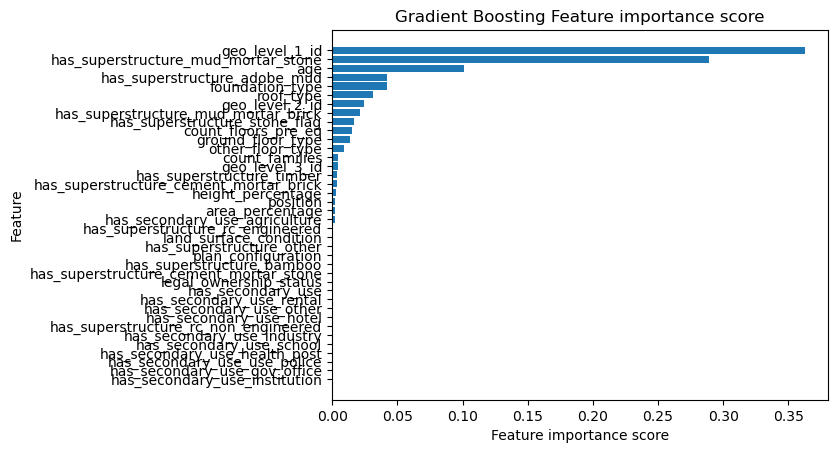

In [22]:
#Plot feature importance chart
plt.barh(train_data.columns[sorted_fi], feature_importance[sorted_fi])
plt.xlabel('Feature importance score')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature importance score')
plt.show()